## Practice 1. K-means clustering

붓꽃의 꽃받침 길이와 너비, 꽃잎의 길이와 너비, 그리고 종을 담은 데이터 셋이 있습니다. 종을 모른다고 가정하고 K-means clustering을 이용해서 군집을 지어보세요. elbow method를 이용해서 최적의 클러스터 개수를 찾아보세요. K-means clustering으로 묶은 군집이 실제 종과 얼마나 일치하는 지를 비교해보세요

In [3]:
import pandas as pd

df = pd.read_csv("./data/iris.csv")

In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
df["color"] = label_encoder.fit_transform(df["Species"])

In [47]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,color
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [34]:
cur_df = df[["PetalLengthCm", "SepalLengthCm", "color"]]
data = cur_df.drop(["color"], axis=1).values

In [35]:
from sklearn.cluster import KMeans

model = KMeans(
    n_init=10,
    n_clusters=3,
)
model.fit(data)

KMeans(n_clusters=3, n_init=10)

In [36]:
def inference(model, data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    return xx, yy, Z

In [45]:
import numpy as np
from matplotlib import pyplot as plt

def plot_kmeans_cluster(xx, yy, Z, model, data, columns, species):
    labels = model.labels_
    centroids = model.cluster_centers_
    plt.clf()
    Z = Z.reshape(xx.shape)
    # plt.imshow(
    #     Z, 
    #     interpolation='nearest', 
    #     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    #     cmap=plt.cm.Pastel2, 
    #     aspect = 'auto', 
    #     origin='lower'
    # )
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    # plt.scatter(centroids[: , 0], centroids[: , 1],  s=300, c='red', alpha = 0.5)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()
    
    plt.scatter(data[:, 0], data[:, 1], c=species, s=10)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()

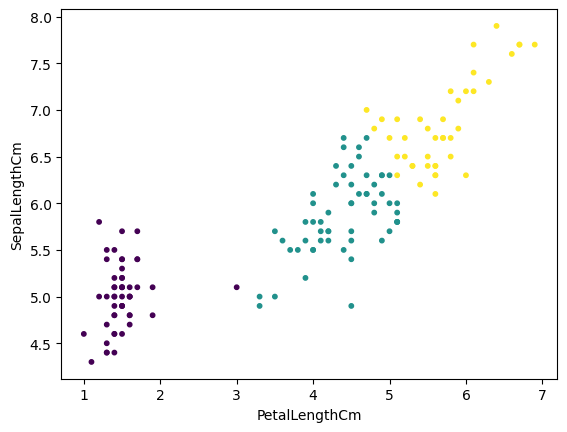

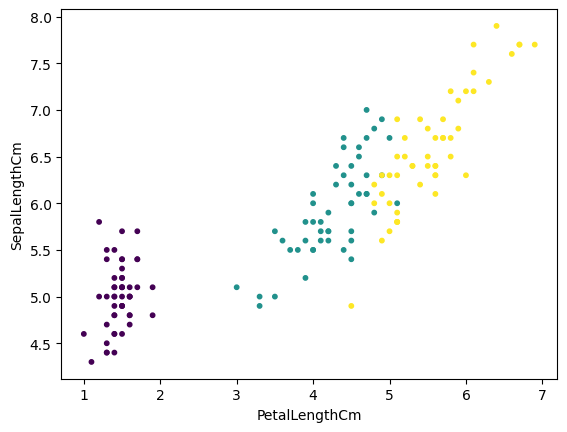

In [46]:
columns = cur_df.columns
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns, cur_df["color"])